In [55]:
import catboost

In [56]:
import pandas as pd
import numpy as np
import os
np.set_printoptions(precision=4)
import catboost
from catboost import *

In [5]:
train_feats = pd.read_csv('/home/kikikita/Рабочий стол/CS_GO_test/data/train_feats.csv')
train_feats.head()

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
0,289,6665,7718,Ancient,0,132,-10.0,176,-0.20,-0.6,...,0.31,0.46,0.19,135,89,34,13,0.62,0.12,7.4
1,715,4411,10577,Inferno,0,-345,-13.7,-317,-0.14,-3.1,...,-0.23,-0.51,-0.17,-11,-113,-17,24,-1.60,-0.38,-0.5
2,157,11251,9455,Nuke,1,293,13.0,182,0.31,25.0,...,-0.08,0.23,0.09,49,40,-21,-14,-0.39,-0.36,28.7
3,524,4608,7532,Mirage,0,108,-24.5,-55,0.54,1.5,...,0.25,0.28,0.21,152,79,59,36,0.59,0.36,7.8
4,404,8637,6667,Overpass,1,33,5.8,59,-0.09,-9.1,...,-0.03,-0.07,0.01,-44,-15,0,7,-0.82,0.08,0.0


In [57]:
X = train_feats.drop(['who_win','team1_id', 'team2_id', 'map_name'], axis=1).astype('string')
y = train_feats.who_win.astype('int64')

In [58]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [59]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 386, One count = 327


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [61]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [62]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 100
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.1

cv_data = cv(
    params = params, #параметры модели
    pool = Pool(X, label=y, cat_features=cat_features), #датасет на котором хотим обучаться
    fold_count=5, #число фолдов, на которые бьем датасет(сколько будет одновременных обучений)
    shuffle=True, #перемешивание датасета перед разбиением
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.686915266
bestIteration = 4

Training on fold [1/5]

bestTest = 0.6838240974
bestIteration = 9

Training on fold [2/5]

bestTest = 0.6729171371
bestIteration = 12

Training on fold [3/5]

bestTest = 0.6906424344
bestIteration = 1

Training on fold [4/5]

bestTest = 0.6931353116
bestIteration = 8



In [63]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.692705,0.001429,0.684247,0.004320,0.503013,0.031527
1,1,0.691488,0.001893,0.677516,0.003980,0.529100,0.049112
2,2,0.690584,0.003207,0.670715,0.005632,0.545246,0.045885
3,3,0.690054,0.003492,0.665470,0.006017,0.544553,0.043795
4,4,0.688603,0.004925,0.658696,0.005694,0.547759,0.048481


In [64]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
#выводит значение лучшего Logloss + std на шаге
print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.6881±0.0086 on step 9


In [65]:
model_with_early_stop = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20 #если на протяжении 20 итераций, ошибка не уменьшается - остановка обучения
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [66]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC', #метрика по которой происходит остановка обучения
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [67]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [68]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool) #возвращает ROC кривую
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

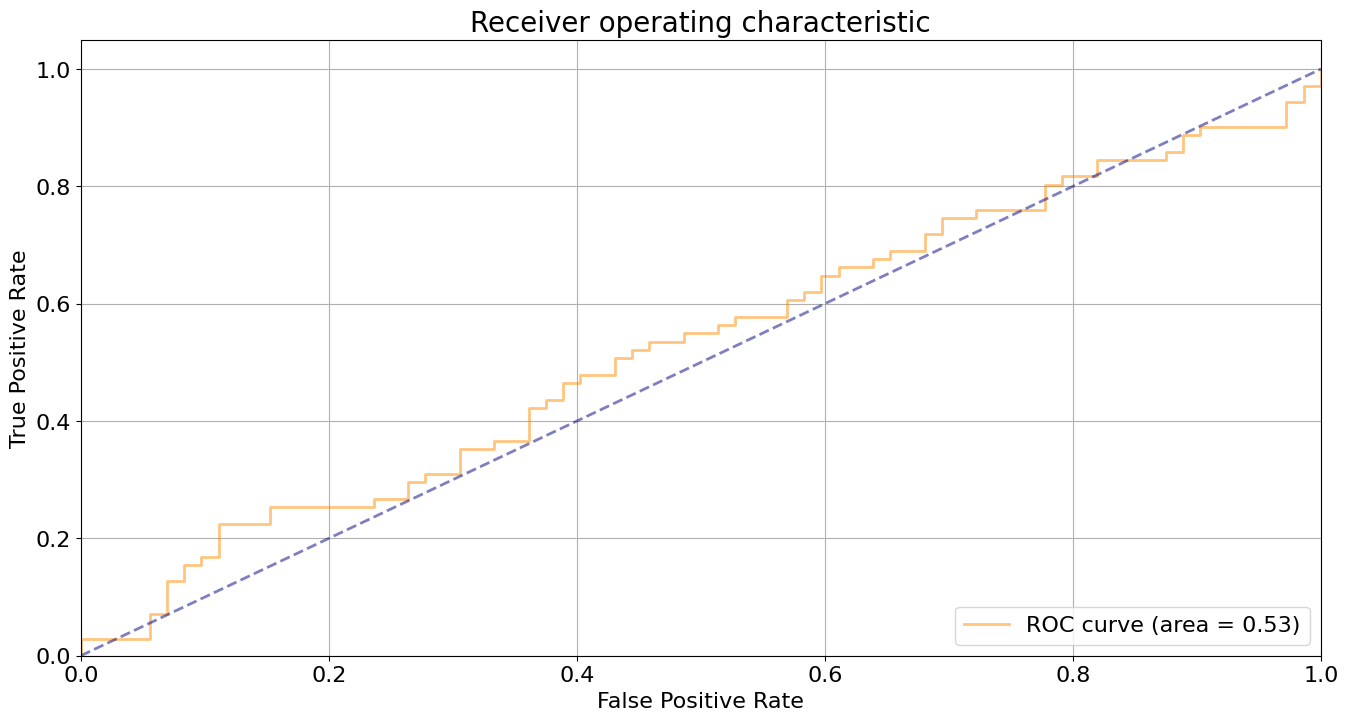

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [70]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

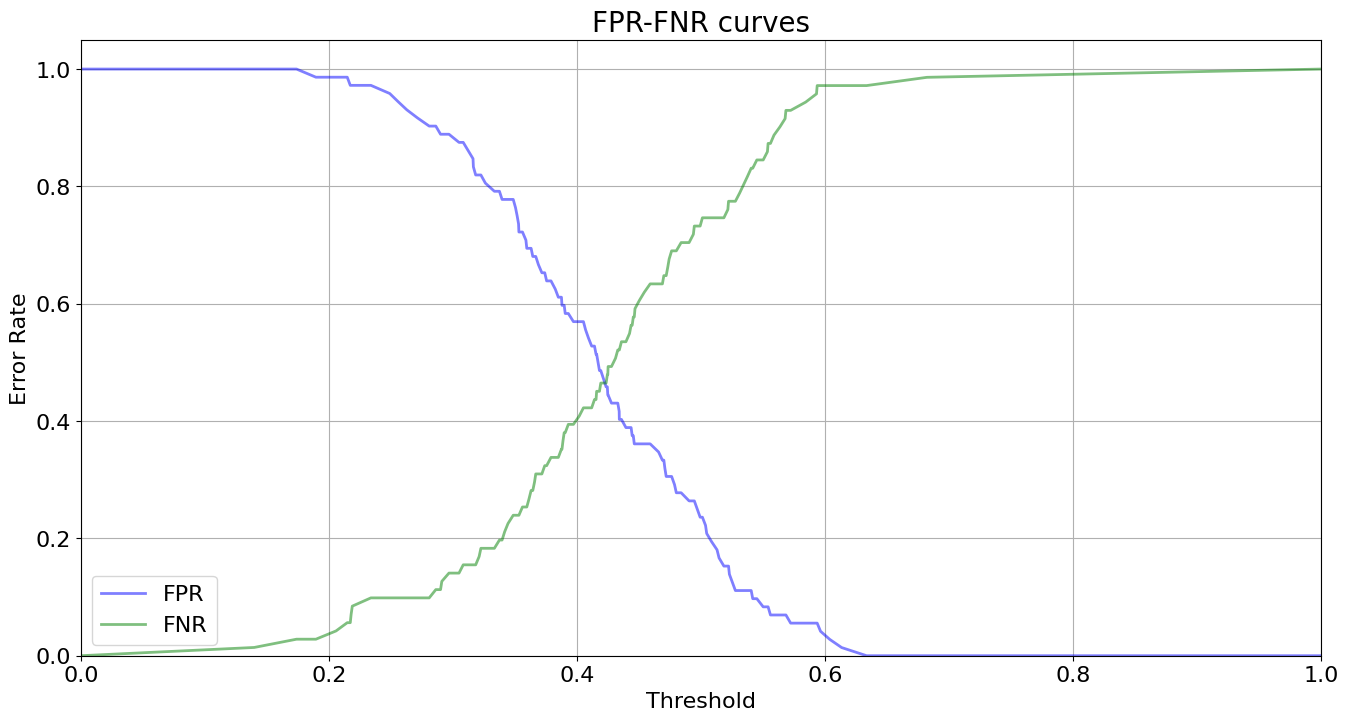

In [71]:
plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [72]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01)) #хотим ошибаться в 1% объектов положительного класса
print(select_threshold(model=model, data=eval_pool, FPR=0.01)) #хотим меньше ошибаться в определении объектов отрицательного класса

0.0
0.633730861348851


In [40]:
print(model.predict_proba(X=X_validation))

[[0.4325 0.5675]
 [0.5269 0.4731]
 [0.6397 0.3603]
 [0.4421 0.5579]
 [0.4459 0.5541]
 [0.5051 0.4949]
 [0.568  0.432 ]
 [0.6465 0.3535]
 [0.6704 0.3296]
 [0.5313 0.4687]
 [0.6469 0.3531]
 [0.4527 0.5473]
 [0.5449 0.4551]
 [0.4312 0.5688]
 [0.7828 0.2172]
 [0.5745 0.4255]
 [0.6373 0.3627]
 [0.407  0.593 ]
 [0.5656 0.4344]
 [0.4863 0.5137]
 [0.4764 0.5236]
 [0.5813 0.4187]
 [0.5246 0.4754]
 [0.6581 0.3419]
 [0.5623 0.4377]
 [0.5869 0.4131]
 [0.7379 0.2621]
 [0.5565 0.4435]
 [0.6006 0.3994]
 [0.4059 0.5941]
 [0.5264 0.4736]
 [0.7825 0.2175]
 [0.5658 0.4342]
 [0.5224 0.4776]
 [0.6582 0.3418]
 [0.401  0.599 ]
 [0.6983 0.3017]
 [0.4064 0.5936]
 [0.6239 0.3761]
 [0.5891 0.4109]
 [0.3507 0.6493]
 [0.6104 0.3896]
 [0.554  0.446 ]
 [0.5658 0.4342]
 [0.5955 0.4045]
 [0.6409 0.3591]
 [0.5529 0.4471]
 [0.6127 0.3873]
 [0.6177 0.3823]
 [0.5846 0.4154]
 [0.4842 0.5158]
 [0.6497 0.3503]
 [0.6269 0.3731]
 [0.7098 0.2902]
 [0.4593 0.5407]
 [0.4569 0.5431]
 [0.3909 0.6091]
 [0.5053 0.4947]
 [0.4953 0.504

In [24]:
print(model.predict(data=X_validation))

[1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]


In [44]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=50
)

0:	learn: 0.6867963	total: 9.15ms	remaining: 906ms
50:	learn: 0.4420341	total: 471ms	remaining: 452ms
99:	learn: 0.2727015	total: 848ms	remaining: 0us


In [45]:
metrics = model.eval_metrics(
    data=Pool(X, label=y, cat_features=cat_features),
    metrics=['Logloss','AUC', 'F1'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [73]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,p3_deaths_per_round,4.141913
1,p3_total_opening_kills,3.909201
2,p1_saved_by_teammate_per_round,3.096698
3,p1_deaths_per_round,3.040360
4,p3_total_opening_deaths,2.869791
...,...,...
115,p5_kill_round,0.000000
116,p5_total_opening_kills,0.000000
117,p5_opening_kill_ratio,0.000000
118,p5_opening_kill_rating,0.000000


In [47]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy', 'F1'],
    boosting_type='Plain', #тип бустинга
    bootstrap_type='Bernoulli', #тип сэмплирования
    subsample=0.5, #процент объектов, которые будут использоваться при построении дерева
    one_hot_max_size=20, 
    rsm=0.5,
    leaf_estimation_iterations=5, #5 раз считаем значения одного и того же дерева в листьях
    max_ctr_complexity=1) #комбинации фичей
    
fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [48]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.5
0:	learn: 0.6747422	total: 7.54ms	remaining: 0us


In [51]:
metrics = best_model.eval_metrics(
    data=Pool(X, label=y, cat_features=cat_features),
    metrics=['Logloss','AUC', 'F1', 'Accuracy'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [84]:
X_test = X_validation#.drop('y', axis=1).astype("string")
test_pool = Pool(data=X_test, cat_features=cat_features)
predictions = best_model.predict_proba(test_pool)
print('Predictoins:')
print(predictions)

Predictoins:
[[0.8043 0.1957]
 [0.3954 0.6046]
 [0.5007 0.4993]
 [0.3931 0.6069]
 [0.7943 0.2057]
 [0.3762 0.6238]
 [0.676  0.324 ]
 [0.5465 0.4535]
 [0.4105 0.5895]
 [0.8069 0.1931]
 [0.8055 0.1945]
 [0.6241 0.3759]
 [0.438  0.562 ]
 [0.6355 0.3645]
 [0.5939 0.4061]
 [0.3933 0.6067]
 [0.4103 0.5897]
 [0.5538 0.4462]
 [0.4758 0.5242]
 [0.6783 0.3217]
 [0.4124 0.5876]
 [0.6189 0.3811]
 [0.5435 0.4565]
 [0.686  0.314 ]
 [0.1826 0.8174]
 [0.5244 0.4756]
 [0.4699 0.5301]
 [0.5906 0.4094]
 [0.8819 0.1181]
 [0.3464 0.6536]
 [0.676  0.324 ]
 [0.5133 0.4867]
 [0.7599 0.2401]
 [0.5464 0.4536]
 [0.5536 0.4464]
 [0.3156 0.6844]
 [0.3862 0.6138]
 [0.4036 0.5964]
 [0.3902 0.6098]
 [0.7365 0.2635]
 [0.4474 0.5526]
 [0.8899 0.1101]
 [0.8844 0.1156]
 [0.7351 0.2649]
 [0.8197 0.1803]
 [0.5636 0.4364]
 [0.6858 0.3142]
 [0.1473 0.8527]
 [0.8112 0.1888]
 [0.5892 0.4108]
 [0.6222 0.3778]
 [0.4374 0.5626]
 [0.2404 0.7596]
 [0.5556 0.4444]
 [0.728  0.272 ]
 [0.248  0.752 ]
 [0.7757 0.2243]
 [0.7267 0.2733]
 

In [85]:
y_true = y_validation#pd.DataFrame(test_df.y)
y_pred = best_model.predict(test_pool)

In [86]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

0.46153846153846156
0.41221374045801523
0.45
0.38028169014084506


In [33]:
best_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,p2_saved_by_teammate_per_round,27.808112
1,p1_total_opening_kills,22.910313
2,p5_kills_per_round,15.183250
3,p5_saved_teammates_per_round,13.921122
4,p2_maps_played,11.436820
...,...,...
115,p5_total_opening_kills,0.000000
116,p5_total_opening_deaths,0.000000
117,p5_opening_kill_ratio,0.000000
118,p5_opening_kill_rating,0.000000


In [79]:
my_best_model = best_model

In [87]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

CatBoostError: catboost/libs/model/model_import_interface.h:19: Model file doesn't exist: catboost_model.bin